     appid                                               name  \
0  1661900  Human Apocalypse - Reverse Horror Zombie Indie...   
1   292000                             No More Room In Hell 2   
2   108600                                    Project Zomboid   
3  1456940                                            Level Z   
4  2625510                              Don't Scream Together   

           developer             publisher  score_rank  positive  negative  \
0  Euphoric Brothers     Euphoric Brothers         NaN        50        17   
1        Lever Games           Lever Games         NaN         0         0   
2    The Indie Stone       The Indie Stone         NaN    281805     17554   
3      DogHowl Games  Creative Black Chair         NaN         0         0   
4                NaN                   NaN         NaN         0         0   

   userscore                    owners  average_forever  average_2weeks  \
0          0               0 .. 20,000                0          

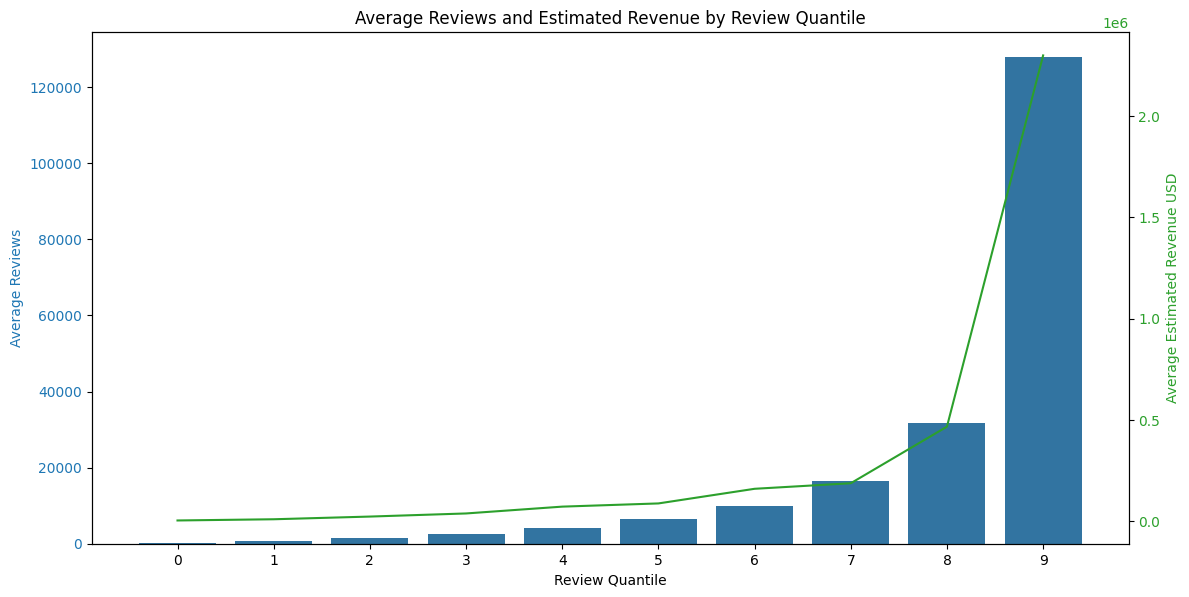

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Display the first few rows of the dataframe to understand its structure
print(games_df.head())

# Data Cleaning
# Drop rows with missing values in positive, negative, or price columns
games_df.dropna(subset=['positive', 'negative', 'price'], inplace=True)

# Convert relevant columns to appropriate data types
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)

# Ensure price is in the correct units (dollars instead of cents)
games_df['price'] = games_df['price'] / 100  # Assuming price is in cents, convert to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']

# Filter out rows where reviews are zero
games_df = games_df[games_df['reviews'] > 0]

# Assume 2% of buyers leave a review, so the factor is 50
review_factor = 50

# Estimate revenue
games_df['estimated_revenue'] = games_df['reviews'] * review_factor * games_df['price']

# Check for unique values in the reviews column
unique_reviews = games_df['reviews'].nunique()
print(f"Unique review values: {unique_reviews}")

# Data Analysis
# Reduce the number of quantiles if there are not enough unique values
num_quantiles = min(10, unique_reviews)

# Calculate quantiles for reviews and estimated revenue
if num_quantiles > 1:
    games_df['review_quantile'] = pd.qcut(games_df['reviews'], num_quantiles, labels=False, duplicates='drop')
    games_df['revenue_quantile'] = pd.qcut(games_df['estimated_revenue'], num_quantiles, labels=False, duplicates='drop')

    # Group by review quantile and calculate statistics
    review_stats = games_df.groupby('review_quantile').agg({
        'reviews': ['mean', 'median'],
        'estimated_revenue': ['mean', 'median'],
        'price': ['mean', 'median']
    }).reset_index()

    review_stats.columns = ['review_quantile', 'mean_reviews', 'median_reviews', 'mean_estimated_revenue', 'median_estimated_revenue', 'mean_price', 'median_price']

    # Display the statistics
    print(review_stats)

    # Data Visualization
    # Plot average reviews and estimated revenue by review quantile
    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Review Quantile')
    ax1.set_ylabel('Average Reviews', color=color)
    sns.barplot(x=review_stats['review_quantile'], y=review_stats['mean_reviews'], ax=ax1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Average Estimated Revenue', color=color)
    sns.lineplot(x=review_stats['review_quantile'], y=review_stats['mean_estimated_revenue'], ax=ax2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Average Reviews and Estimated Revenue by Review Quantile')
    plt.show()
else:
    print("Not enough unique review values to create quantiles.")

